In [1]:
from time import time
import numpy as np
from tst.domutil.util import *
from copy import copy
from scipy.sparse import *
from scipy.spatial.distance import *


def normalise(hc1, hc2, hcboth):
    log1 =  np.log10( hc1 + 1) 
    log2 =  np.log10( hc1 + 1) 
    log3 =  np.log10( hcboth + 1) 
    norm = (log1 + log2) / 2 - log3 
    return norm

from itertools import izip
def sort_coo(m):
    tuples = izip(m.row, m.col, m.data)
    return sorted(tuples, key=lambda x: (x[2]))


/home/shouldsee/.local/lib/python2.7/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [2]:
%%time
# print "finished"
# ;
hmms = HMMprofile.objects.defer('text').all().prefetch_related('hits')
hmms = hmms.annotate(hcount = Count('hits')).order_by('id')

hmmids = list(hmms.values_list('id',flat = True))
hcounts = list(hmms.values_list('hcount',flat = True))
sfs = list(hmms.values_list('cath_node__parent',flat = True))

sDB = seqDB.objects.get(name = 'CATH')
sDB.sequence_set.count()
seq = sDB.sequence_set.first()

seqset_all = sDB.sequence_set.all().prefetch_related('hmmprofile_set')

# seq.HMMprofile
# seq.hmmprofile
# dir(seq)
seq.hmmprofile_set.count()


CPU times: user 140 ms, sys: 20 ms, total: 160 ms
Wall time: 49.6 s


In [ ]:
%%time

# hmms2hit_ids = lambda hmms: np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)

# hmms2hit_ids_para = lambda hmms,pool: np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)
X0 = hmms2hit_ids(hmms)

In [8]:
%%time

# t0 = time()
# c = counter(range(len(X)**2/2),per = 1E3)
# from multiprocessing import *

hmms_test = HMMprofile.objects.defer('text').all().prefetch_related('hits')[:200]
# hmms_test = HMMprofile.objects.defer('text').all().prefetch_related('hits')[:500]
X = hmms2hit_ids( hmms_test )

CPU times: user 324 ms, sys: 12 ms, total: 336 ms
Wall time: 442 ms


0.185712814331
19900


In [ ]:
from tst.domutil.util import *
# its = D.iteritems()
its = using_tocoo_izip(D)

xs = []
ys = []
zs = []
sfbools = [];

c = counter(range(6563388),per = 100000)

for xi,yi,inter_ct in its:
    c.count()
#     xct = 
    x = hcounts[xi]
    y = hcounts[yi]

    xs.append( x )
    ys.append( y )
    zs.append(inter_ct)
    sfbools.append(sfs[xi]==sfs[yi])
#     normz = log10()
# print next(its)
# print next(its)

# ys 

In [3]:
%%time

import itertools as it
from collections import Counter

def pair_gen(seqset_all):
    c = counter(range(seqset_all.count()))
    batches = batch_qs( seqset_all, 500)
    for seqset in batches:
        
#             hmmids = seq.values_list("hmmprofile",flat =True)
        for seq in seqset:
            c.count()
            hmmids = seq.hmmprofile_set.values_list("id",flat = True)
#             pairs = it.combinations(sorted(hmmids),2)
            pairs = it.combinations( hmmids ,2)
            for p in pairs:
                yield p

def batch_worker(seqset):
    count = Counter()
    for seq in seqset:
        c0.count()
        hmmids = seq.hmmprofile_set.values_list("id",flat = True)
    #             pairs = it.combinations(sorted(hmmids),2)
        pairs = it.combinations( hmmids ,2)
        count.update(pairs)
    q.put(count)
    c1.count()
    return 


def seq_counter(seq):
    c0.count()
    hmmids = seq.hmmprofile_set.values_list("id",flat = True)
#             pairs = it.combinations(sorted(hmmids),2)
    pairs = it.combinations( hmmids ,2)
    count = Counter(pairs)
    q.put(count)


    
    

def listener(counts):
#     counts = Counter([])
    i = 0
    while 1:
        print i
        i += 1
        c1.fail('Listener: %d '%(i))
        obj = q.get()
        if obj:
            counts.update(obj)
        else:
            q.put(counts)
            return
#     while 1:
#         pidx = q.get()
#         if pidx:
#             x,y = pidx 
#             D[x-1,y-1] += 1
#         else:
#             return D




CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 17.9 µs


In [4]:
print seqset_all.count()

80407


In [5]:
%%time
from scipy.sparse import *
import multiprocessing as mp
from multiprocessing.managers import BaseManager, SyncManager
# class MyManager(BaseManager): pass
class MyManager(SyncManager): pass
MyManager.register('counter',counter)


# c = counter(range(sDB.sequence_set.count()))

pcount = 5
# INPUT = seqset_all[:3000]
INPUT = seqset_all
ct1 = INPUT.count()
INPUT = batch_qs( INPUT, 600)

l = max(hmmids)
# OUTPUT = dok_matrix( (l,l), dtype = 'int')
OUTPUT = Counter()

local_worker = batch_worker
# local_worker = seq_counter
local_listener = listener      

if __name__=='__main__':
    
    #     m = mp.Manager()
        m = MyManager()
        m.start()
    #     raise Exception
    #     manager.start()
        c0 = m.counter( range(ct1),INF=0, ifprint = 1)
        c1 = m.counter( [],INF=1, ifprint = 1)

        q = m.Queue();          

        if 1:
            pool = mp.Pool( pcount )
            watcher  = mp.Process(target = local_listener, args = [OUTPUT])
            watcher.start()
#             watcher  = pool.apply_async(local_listener, args = [OUTPUT])
            jobs = []

            for INPUT_curr in INPUT:
                job  = pool.apply_async(local_worker, args = (INPUT_curr, ))
                jobs.append(job)
            for job in jobs:
                job.get()

#             jobs = pool.imap_unordered(local_listener, INPUT) 
#             for job in jobs:
#                 pass

#             jobs = [pool.map_async(local_listener, INPUT) ] 
#             r0 = job.get()
        
            q.put(None)
#             OUTPUT = watcher.get()
            watcher.join()
            OUTPUT = q.get() 
#             OUTPUT = 

0
Listener: 1 
0 of -1
100 of -1
200 of -1
300 of -1
400 of -1
500 of -1
600 of -1
700 of -1
800 of -1
 800 of -1
900 of -1
1000 of -1
1100 of -1
0 of -1
1200 of -1
1
Listener: 2 
1300 of -1
1400 of -1
Listener: 3 
2
1500 of -1
1600 of -1
1700 of -1
 1700 of -1
1800 of -1
1900 of -1
2000 of -1
2100 of -1
 2100 of -1
2200 of -1
 2200 of -1
2300 of -1
 2600 of -1
2400 of -1
2500 of -1
2600 of -1
2700 of -1
 2700 of -1
2800 of -1
3
Listener: 4 
2900 of -1
3000 of -1
3100 of -1
4
Listener: 5 
3200 of -1
3300 of -1
 3400 of -1
3400 of -1
3500 of -1
3600 of -1
5
Listener: 6 
3700 of -1
3800 of -1
3900 of -1
4000 of -1
4100 of -1
6
Listener: 7 
4200 of -1
 4200 of -1
4300 of -1
4400 of -1
4500 of -1
4600 of -1
 4600 of -1
4700 of -1
 4700 of -1
4800 of -1
4900 of -1
5000 of -1
5100 of -1
 5100 of -1
5200 of -1
5300 of -1
 5300 of -1
5400 of -1
5500 of -1
5600 of -1
 5600 of -1
 5700 of -1
5700 of -1
 5700 of -1
5800 of -1
 5800 of -1
 5900 of -1
 5900 of -1
5900 of -1
 6000 of -1
 6000 of -1


35000 of -1
 35000 of -1
 35000 of -1
 35000 of -1
35100 of -1
 35100 of -1
 35100 of -1
35200 of -1
Listener: 57 
 35200 of -1
56
35300 of -1
 35300 of -1
35400 of -1
 35400 of -1
 35400 of -1
35500 of -1
35600 of -1
35700 of -1
 35700 of -1
35800 of -1
 35800 of -1
35900 of -1
 35900 of -1
 35900 of -1
36000 of -1
 36000 of -1
36100 of -1
 36200 of -1
36200 of -1
57
Listener: 58 
36300 of -1
36400 of -1
58
Listener: 59 
36500 of -1
 36500 of -1
 36600 of -1
36600 of -1
 36600 of -1
36700 of -1
 36700 of -1
 36700 of -1
36800 of -1
 36900 of -1
36900 of -1
 37000 of -1
 37000 of -1
37000 of -1
 37000 of -1
59
Listener: 60 
37100 of -1
 37100 of -1
 37100 of -1
 37100 of -1
37200 of -1
 37300 of -1
 37300 of -1
37300 of -1
37400 of -1
60
Listener: 61 
37500 of -1
37600 of -1
 37600 of -1
 37600 of -1
37700 of -1
 37800 of -1
37800 of -1
 37900 of -1
37900 of -1
 38000 of -1
38000 of -1
 38100 of -1
38100 of -1
38200 of -1
 38200 of -1
 38200 of -1
61
Listener: 62 
38300 of -1
 38300 of

68500 of -1
68600 of -1
68700 of -1
 68700 of -1
68700 of -1
68800 of -1
 68800 of -1
68900 of -1
112
Listener: 113 
69000 of -1
 69000 of -1
69100 of -1
 69200 of -1
69200 of -1
 69200 of -1
69300 of -1
 69300 of -1
69400 of -1
113
Listener: 114 
69500 of -1
 69500 of -1
 69500 of -1
69600 of -1
69700 of -1
69800 of -1
 69800 of -1
114
Listener: 115 
69900 of -1
 69900 of -1
70000 of -1
70100 of -1
70200 of -1
 70200 of -1
 70300 of -1
70300 of -1
 70300 of -1
70400 of -1
70500 of -1
115
Listener: 116 
70600 of -1
70700 of -1
 70700 of -1
70800 of -1
70900 of -1
 70900 of -1
 71000 of -1
71000 of -1
71100 of -1
 71100 of -1
71200 of -1
116
Listener: 117 
71300 of -1
 71300 of -1
71400 of -1
71500 of -1
71600 of -1
 71700 of -1
 71600 of -1
117
Listener: 118 
71700 of -1
 71700 of -1
71800 of -1
71900 of -1
72000 of -1
72100 of -1
72200 of -1
72300 of -1
 72300 of -1
 72300 of -1
118
Listener: 119 
72400 of -1
72500 of -1
 72500 of -1
72600 of -1
72700 of -1
 72700 of -1
72800 of -1
11

In [7]:
# r = watcher.get()
pool.close()
pool.join()

counts = OUTPUT
D_curr = dok_matrix( ( l , l ) ,dtype = np.int)

In [32]:
# %%time 

# ##### Single-Thread older counting routine

# from collections import Counter
# import multiprocessing as mp


# t0 = time()    
# g = pair_gen(seqset_all.all())
# counts = Counter(g)
# print time()-t0
# # set(g)

0 of 80407
100 of 80407
200 of 80407
300 of 80407
400 of 80407
500 of 80407
600 of 80407
700 of 80407
800 of 80407
900 of 80407
1000 of 80407
1100 of 80407
1200 of 80407
1300 of 80407
1400 of 80407
1500 of 80407
1600 of 80407
1700 of 80407
1800 of 80407
1900 of 80407
2000 of 80407
2100 of 80407
2200 of 80407
2300 of 80407
2400 of 80407
2500 of 80407
2600 of 80407
2700 of 80407
2800 of 80407
2900 of 80407
3000 of 80407
3100 of 80407
3200 of 80407
3300 of 80407
3400 of 80407
3500 of 80407
3600 of 80407
3700 of 80407
3800 of 80407
3900 of 80407
4000 of 80407
4100 of 80407
4200 of 80407
4300 of 80407
4400 of 80407
4500 of 80407
4600 of 80407
4700 of 80407
4800 of 80407
4900 of 80407
5000 of 80407
5100 of 80407
5200 of 80407
5300 of 80407
5400 of 80407
5500 of 80407
5600 of 80407
5700 of 80407
5800 of 80407
5900 of 80407
6000 of 80407
6100 of 80407
6200 of 80407
6300 of 80407
6400 of 80407
6500 of 80407
6600 of 80407
6700 of 80407
6800 of 80407
6900 of 80407
7000 of 80407
7100 of 80407
7200

55400 of 80407
55500 of 80407
55600 of 80407
55700 of 80407
55800 of 80407
55900 of 80407
56000 of 80407
56100 of 80407
56200 of 80407
56300 of 80407
56400 of 80407
56500 of 80407
56600 of 80407
56700 of 80407
56800 of 80407
56900 of 80407
57000 of 80407
57100 of 80407
57200 of 80407
57300 of 80407
57400 of 80407
57500 of 80407
57600 of 80407
57700 of 80407
57800 of 80407
57900 of 80407
58000 of 80407
58100 of 80407
58200 of 80407
58300 of 80407
58400 of 80407
58500 of 80407
58600 of 80407
58700 of 80407
58800 of 80407
58900 of 80407
59000 of 80407
59100 of 80407
59200 of 80407
59300 of 80407
59400 of 80407
59500 of 80407
59600 of 80407
59700 of 80407
59800 of 80407
59900 of 80407
60000 of 80407
60100 of 80407
60200 of 80407
60300 of 80407
60400 of 80407
60500 of 80407
60600 of 80407
60700 of 80407
60800 of 80407
60900 of 80407
61000 of 80407
61100 of 80407
61200 of 80407
61300 of 80407
61400 of 80407
61500 of 80407
61600 of 80407
61700 of 80407
61800 of 80407
61900 of 80407
62000 of 8

In [ ]:
# next(counts.iteritems()[0]
c = counter([],INF = 1)
for (x,y),v in counts.iteritems():
    print x,y
    hmm1 = hmms.get(id = x)
    hmm2 = hmms.get(id = y)
    hmm1hits = hmm1.hits.values_list('id')
    hmm2hits = hmm2.hits.values_list('id')
    interhits = set(hmm1hits) & set(hmm2hits)
    intercount = len(interhits)
    print v
    print intercount
    assert v == len(interhits)
    c.count()
    if c.i == 10:
        break


In [9]:
%%time
from scipy.sparse import *
# D = csr_matrix(zip(*counts.keys()),counts.values())
# D = coo_matrix(  (counts.values(),  zip(*counts.keys())) ,dtype = 'int') 
# D = dok_matrix((21086,21086),dtype = np.int)
def dict2dok(INPUT,l = None):
    INPUT = counts
    D_curr = dok_matrix( ( l , l ) ,dtype = np.int)
    # t0 = time()    
    c=counter( INPUT,per=10000)
    for (x,y),v in INPUT.iteritems():
        c.count()
        D_curr[x-1,y-1] = v
    # print time()-t0
    return D_curr

l = max(hmmids)

D_raw = dict2dok(counts, l = l)
#     D_raw = D_curr

0 of 6582719
10000 of 6582719
20000 of 6582719
30000 of 6582719
40000 of 6582719
50000 of 6582719
60000 of 6582719
70000 of 6582719
80000 of 6582719
90000 of 6582719
100000 of 6582719
110000 of 6582719
120000 of 6582719
130000 of 6582719
140000 of 6582719
150000 of 6582719
160000 of 6582719
170000 of 6582719
180000 of 6582719
190000 of 6582719
200000 of 6582719
210000 of 6582719
220000 of 6582719
230000 of 6582719
240000 of 6582719
250000 of 6582719
260000 of 6582719
270000 of 6582719
280000 of 6582719
290000 of 6582719
300000 of 6582719
310000 of 6582719
320000 of 6582719
330000 of 6582719
340000 of 6582719
350000 of 6582719
360000 of 6582719
370000 of 6582719
380000 of 6582719
390000 of 6582719
400000 of 6582719
410000 of 6582719
420000 of 6582719
430000 of 6582719
440000 of 6582719
450000 of 6582719
460000 of 6582719
470000 of 6582719
480000 of 6582719
490000 of 6582719
500000 of 6582719
510000 of 6582719
520000 of 6582719
530000 of 6582719
540000 of 6582719
550000 of 6582719
560000

4380000 of 6582719
4390000 of 6582719
4400000 of 6582719
4410000 of 6582719
4420000 of 6582719
4430000 of 6582719
4440000 of 6582719
4450000 of 6582719
4460000 of 6582719
4470000 of 6582719
4480000 of 6582719
4490000 of 6582719
4500000 of 6582719
4510000 of 6582719
4520000 of 6582719
4530000 of 6582719
4540000 of 6582719
4550000 of 6582719
4560000 of 6582719
4570000 of 6582719
4580000 of 6582719
4590000 of 6582719
4600000 of 6582719
4610000 of 6582719
4620000 of 6582719
4630000 of 6582719
4640000 of 6582719
4650000 of 6582719
4660000 of 6582719
4670000 of 6582719
4680000 of 6582719
4690000 of 6582719
4700000 of 6582719
4710000 of 6582719
4720000 of 6582719
4730000 of 6582719
4740000 of 6582719
4750000 of 6582719
4760000 of 6582719
4770000 of 6582719
4780000 of 6582719
4790000 of 6582719
4800000 of 6582719
4810000 of 6582719
4820000 of 6582719
4830000 of 6582719
4840000 of 6582719
4850000 of 6582719
4860000 of 6582719
4870000 of 6582719
4880000 of 6582719
4890000 of 6582719
4900000 of 6

In [11]:
%%time
#### Cache the raw ISS matrix

import cPickle as pk

fname = 'data/ISS_raw'

pk.dump(D_raw.tocoo(),open(  fname ,'wb'))

if 'D_raw' not in locals().keys():
    D_raw = pk.load(open(fname, 'rb'))

# D_raw = pk.load(open(fname, 'rb'))

CPU times: user 18.7 s, sys: 1.2 s, total: 19.9 s
Wall time: 20.9 s


In [21]:
%%time
##### normalise the raw ISS matrix
if 'D_raw' not in locals().keys():
    fname = 'data/ISS_raw'
    D_raw = pk.load(open(fname, 'rb'))
c=counter(range(6577065),per=100000)
D_curr = dok_matrix((21087,21087),dtype = np.float)

for x,y,v in using_tocoo_izip(D_raw):
    c.count()
    h1 = hcounts[x]
    h2 = hcounts[y]
    h3 = v
    z = normalise(h1,h2,h3)
    D_curr[x,y] = z
D_norm = D_curr

0 of 6577065
100000 of 6577065
200000 of 6577065
300000 of 6577065
400000 of 6577065
500000 of 6577065
600000 of 6577065
700000 of 6577065
800000 of 6577065
900000 of 6577065
1000000 of 6577065
1100000 of 6577065
1200000 of 6577065
1300000 of 6577065
1400000 of 6577065
1500000 of 6577065
1600000 of 6577065
1700000 of 6577065
1800000 of 6577065
1900000 of 6577065
2000000 of 6577065
2100000 of 6577065
2200000 of 6577065
2300000 of 6577065
2400000 of 6577065
2500000 of 6577065
2600000 of 6577065
2700000 of 6577065
2800000 of 6577065
2900000 of 6577065
3000000 of 6577065
3100000 of 6577065
3200000 of 6577065
3300000 of 6577065
3400000 of 6577065
3500000 of 6577065
3600000 of 6577065
3700000 of 6577065
3800000 of 6577065
3900000 of 6577065
4000000 of 6577065
4100000 of 6577065
4200000 of 6577065
4300000 of 6577065
4400000 of 6577065
4500000 of 6577065
4600000 of 6577065
4700000 of 6577065
4800000 of 6577065
4900000 of 6577065
5000000 of 6577065
5100000 of 6577065
5200000 of 6577065
5300000 

In [22]:
%%time
import cPickle as pk

fname = 'data/ISS_norm'


pk.dump(D_norm.tocoo(),open(  fname ,'wb'))

# D_test = pk.load(open(fname, 'rb'))

if 'D_norm' not in locals().keys():
    D_norm = pk.load(open(fname, 'rb'))

CPU times: user 12.6 s, sys: 736 ms, total: 13.3 s
Wall time: 14.2 s


In [23]:
%%time

from itertools import izip
def sort_coo(m):
    tuples = izip(m.row, m.col, m.data)
    return sorted(tuples, key=lambda x: (x[2]))


sorted_D_norm = sort_coo(D_norm.tocoo())

CPU times: user 18.4 s, sys: 920 ms, total: 19.3 s
Wall time: 19.3 s


In [ ]:
##### Dumping a list is tooooooooo slow

# %%time
# import cPickle as pk

# fname = 'data/ISS_norm_sorted'

# pk.dump(sorted_D_norm,open(  fname ,'wb'))


# # sorted_D_norm = pk.load(open(fname, 'rb'))

In [24]:
%%time
# sDnorm[0]
# using_coo_izip
# D_curr = Dnorm
D_curr = D_norm

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

CPU times: user 11.3 s, sys: 712 ms, total: 12 s
Wall time: 11.9 s


In [25]:
sorted_D_norm[:10]

[(18955, 11315, 0.00011654219361556528),
 (19375, 13432, 0.00012560939549688399),
 (7872, 7227, 0.00012615671313209731),
 (7872, 4871, 0.00012615671313209731),
 (11354, 13432, 0.00012626674951654593),
 (19392, 20300, 0.00012630347097974948),
 (11503, 16137, 0.00012659801340308974),
 (11595, 5975, 0.00012681982332862773),
 (19912, 14957, 0.00012719123883675465),
 (19912, 9567, 0.00012719123883675465)]

In [9]:
%%time
pdata_D_norm = zip(*sorted_D_norm)

CPU times: user 14.6 s, sys: 328 ms, total: 14.9 s
Wall time: 14.9 s


<module 'numpy.ma' from '/home/shouldsee/.local/lib/python2.7/site-packages/numpy/ma/__init__.pyc'>

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:47: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer


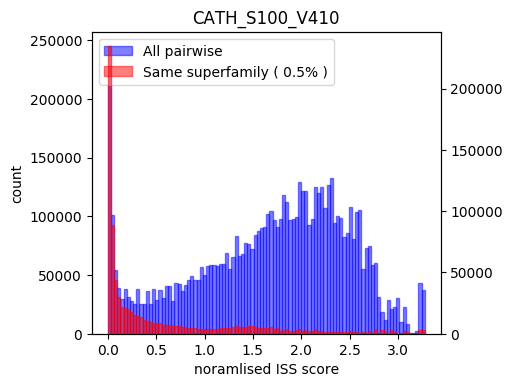

In [27]:
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# kwargs = {
#     'projection':'3d',
# }



kwargs = {'ylabel':'count',
          'xlabel':'noramlised ISS score',
         'title':'CATH_S100_V410',
         }
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1b = ax1.twinx()
# ax1.set_yscale('log')
# ax1.set_xscale('log')

# vals = np.maximum(0,vdata)
# lbls = [None]

lbl = 'All pairwise'
kargs = {'label':lbl}

vals = np.ma.array(vdata,mask = None)

binsA1 = ax1.hist( vals,100, 
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
#     label = ''
     )



lbl = 'Same superfamily ( 0.5% )'
vals = np.delete(np.array(vdata), (sfbools) )

kargs = {'label': lbl}

vals = np.array(vdata)[sfbools]

binsB1 = ax1b.hist( vals,100, 
    edgecolor = 'r',facecolor = 'r',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.5,
     **kargs
     )
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()

ax1.legend(lines + lines2,
           labels + labels2,
           loc = 2)
# ax1.legend( )
# ax1b.legend( )
# ax1.legend( loc = 1)
# ax1b.legend(loc = 2 )
# plt.legend()

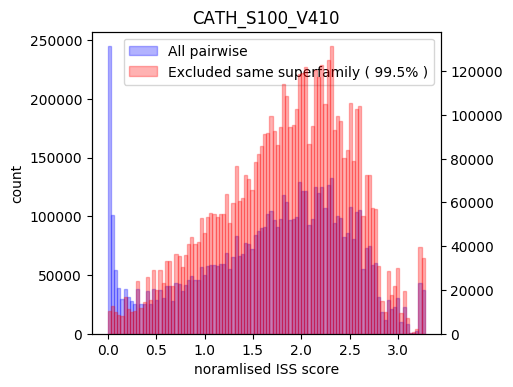

In [37]:
import matplotlib
%matplotlib inline
matplotlib.use("Agg")
from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# kwargs = {
#     'projection':'3d',
# }



kwargs = {'ylabel':'count',
          'xlabel':'noramlised ISS score',
         'title':'CATH_S100_V410',
         }
plt.close('all')
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1b = ax1.twinx()
# ax1.set_yscale('log')
# ax1.set_xscale('log')

# vals = np.maximum(0,vdata)
# lbls = [None]

lbl = 'All pairwise'
kargs = {'label':lbl}

vals = np.ma.array(vdata,mask = None)

binsA1 = ax1.hist( vals,100, 
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.3,
     **kargs
#     label = ''
     )



lbl = 'Excluded same superfamily ( 99.5% )'
# vals = np.delete(np.array(vdata), (sfbools) )
vals = np.array(vdata)[notlist(sfbools)]


kargs = {'label': lbl}

# vals = np.array(vdata)[sfbools]

binsB1 = ax1b.hist( vals,100, 
    edgecolor = 'r',facecolor = 'r',
    # edgecolor = 'r',facecolor = 'r',
#     marker ='o',
    # c = colors,
#      s =100,
     alpha = 0.3,
     **kargs
     )
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1b.get_legend_handles_labels()

ax1.legend(lines + lines2,
           labels + labels2,
           loc =0)
# ax1.legend( )
# ax1b.legend( )
# ax1.legend( loc = 1)
# ax1b.legend(loc = 2 )
# plt.legend()

In [33]:
#### domutil!!
notlist = lambda lst: [not x for x in lst]


[False, False, True]

In [31]:
vals = np.ma.array(vdata,mask = None)
print len(vals)
vals = np.array(vdata), (sfbools) )
print len(vals)


6555856
6555854


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
sum(sfbools)/ float(len(sfbools))

0.005766717966892044

In [73]:
%%time
# sDnorm[0]
# using_coo_izip
D_curr = D_norm
# D_curr = D_raw

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

CPU times: user 11.5 s, sys: 536 ms, total: 12.1 s
Wall time: 12 s


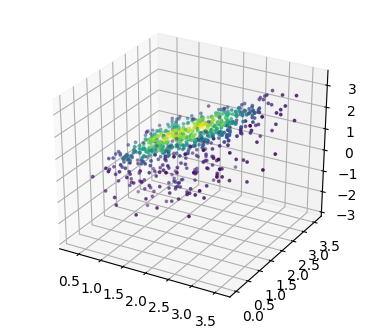

In [75]:
from scipy import stats


import matplotlib
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
kwargs = {
    'projection':'3d',
}
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
# idx = range(1000)

N = 700

xss = [hcounts[xi] for xi in xdata]
yss = [hcounts[xi] for xi in ydata]
zss = np.array(vdata)

# xss = np.array(xss)
# yss = np.array(yss) 
# zss = np.array(zss)

# idx = sfbools
# xss = np.delete(xss,idx)
# yss = np.delete(yss,idx)
# zss = np.delete(zss,idx)

xss= np.array(xss[:N])
yss = np.array(yss[:N])
zss = np.array(zss[:N])

xss = np.log10(xss+1)
yss = np.log10(yss+1)
# zss = np.log10(zss+1)

xyz = np.vstack([xss,yss,zss])
kde = stats.gaussian_kde(xyz)
# ax1.set_zlim([0,2000])

ax1.scatter(xss,yss,zss,'.',3, c = kde([xss,yss,zss]))

X = np.linspace(xss.min(), xss.max(),30)
Y = np.linspace(yss.min(), yss.max(),30)
# Z = np.linspace(zss.min(), zss.max(),30)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (X + Y) / 2 - 2
# surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha = 0.5, 
#                        linewidth=0, antialiased=False)

In [54]:
# type(hmms)
# hmms[2775]
# hmmid1

<HMMprofile: HMM for 3.30.40.20.1.0 >

In [62]:
type( lst[1][0])

numpy.int32

In [ ]:
%%time
# sDnorm[0]
# using_coo_izip
D_curr = D_norm
# D_curr = D_raw

xdata = []
ydata = []
vdata = []
sfbools = []
for x,y,v in using_tocoo_izip(D_curr):
    xdata.append(x)
    ydata.append(y)
    vdata.append(v)
    sfbools.append(sfs[x]==sfs[y])

In [4]:
%%time
# lst = sorted_D_norm
# ?lst = 
D_curr = D_norm
lst = sort_coo(D_curr.tocoo())

In [5]:
newlst = []
for x,y,v in lst:
    if sfs[x]!=sfs[y]:
        newlst.append((x,y,v))
    

In [6]:
lst = newlst
c = counter(lst,per = 1)
i = 0

# for idxx,idxy in lst:

# for i,(hmmid1,hmmid2,v) in enumerate(lst):
for hmmid1,hmmid2,v in lst:
    
#     print hmms[ int(hmmid1) ]
#     print hmms[ int(hmmid2) ]
    hmmid1 = int(hmmid1)
    hmmid2 = int(hmmid2)
    hmm1 = hmms[ hmmid1 ]
    hmm2 = hmms[ hmmid2 ]
#     raise
#     if hmm1.cath_node.parent == hmm2.cath_node.parent:
    cnode1 = hmm1.cath_node
    cnode2 = hmm2.cath_node
    if cnode1.Class == cnode2.Class:
        continue
#     if sfbools[i]:
#         continue
    c.count()   
    
    if c.i >= 2:
        i+=1
        print hmm1
        print hmm2
        print v
        print hmm1.hits.count() + hmm2.hits.count()
        print "http://xhits.cathdb.info/crosshits.php?sf2=%s&sf1=%s&db_source=Crosshits_v4_1_0"%(cnode1.superfamily(),cnode2.superfamily())
        if i == 2:
            break

0 of 6435678
1 of 6435678
HMM for 3.30.40.20.1.0 
HMM for 2.30.30.40.49.0 
-3.27473498487
310
http://xhits.cathdb.info/crosshits.php?sf2=3.30.40.20&sf1=2.30.30.40&db_source=Crosshits_v4_1_0
2 of 6435678
HMM for 3.30.40.20.1.0 
HMM for 1.25.40.10.69.0 
-3.27450422266
212
http://xhits.cathdb.info/crosshits.php?sf2=3.30.40.20&sf1=1.25.40.10&db_source=Crosshits_v4_1_0


In [12]:
print hmmid1 , hmmid2

2775 19585


In [16]:
hmmids = list(hmms.values_list('id',flat = True))

In [22]:
hmmids 
# print hmmids.count()
# print 1 + max( hmmids ) - min( hmmids )

<QuerySet [1L, 2L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 13L, 14L, 15L, 16L, 17L, 18L, 19L, 20L, '...(remaining elements truncated)...']>

In [15]:
D_raw = D_raw.todok()
print D_raw[2775,19585]

3762


In [46]:
key_v = sorted_D_norm[0]
print key_v
# D_temp = D_norm.toarray()

(2775, 19584, -3.2755416884013093)


In [16]:
D_temp[D_temp.nonzero()]
# D_temp

array([2, 3, 3, ..., 4, 1, 3])

In [11]:
# hmms[hmmid1]
hmms[hmmid2]

<HMMprofile: HMM for 1.25.40.10.69.0 >

In [23]:
# hmmid1,hmmid2, v = key_v
# hmmid1 += 1
# hmmid2 += 

hmm1 = HMMprofile.objects.get(id = hmmid1  )
hmm2 = HMMprofile.objects.get(id = hmmid2  )

inter_hitseq = hmm1.hits.all() & hmm2.hits.all()
hits1 = hmm1.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
hits2 = hmm2.hit4hmm2hsp_set.filter(target__in = inter_hitseq)


fmt = "%s,\t domain:%s\t length:%s,\t hitnum:%d"
print "intersection count is",inter_hitseq.count()
print  fmt %(hmm1,hmm1.cath_node.domain, p_hmmlen.findall(hmm1.text)[0], hmm1.hits.count() )
print fmt % (hmm2,hmm2.cath_node.domain, p_hmmlen.findall(hmm2.text)[0], hmm2.hits.count() )
for i,j in zip(hits1,hits2):
    try:
        node =  domain.objects.get(domain_id = i.target.acc).classification
    except:
        node = ''
    print i.target.acc,i.bitscore,
    print j.target.acc,j.bitscore
#     print node
    print i.start,j.start
    print i.end,j.end

intersection count is 0
HMM for 2.40.10.10.124.0 ,	 domain:1mbmA01	 length:70,	 hitnum:6
HMM for 1.10.533.10.5.0 ,	 domain:4i16A00	 length:90,	 hitnum:26


In [ ]:
#### Pairwise calculation


def ISS(u,v):
#     c.count()
    u = u[0]; v = v[0]
    ulen = len(u)
    vlen = len(v)
#     if ulen <= vlen:
#         inter_count = sum(u_curr in v for u_curr in u )
#     else:
#         inter_count = sum(u_curr in u for u_curr in v )
    inter_count = len(set(u) & set(v))
    d = 1 - float(2*inter_count)/(ulen+vlen+1)

    return d

def ISS0(x):
#     c.count()
    return(ISS(*x))
def ISS1(xs):
#     c.count()
    return([ISS(*x) for x in xs] )

# ISS0 = lambda x: ISS(*x)
# ISS1 = lambda xs: [ISS(*x) for x in xs]


hmms2hit_ids = lambda hmms: np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)

hmms2hit_ids_para = lambda hmms,pool: np.expand_dims(
    np.array(
    [list(
        hmm.hits.values_list("id", flat = True)
    )
     for hmm in hmms]
), axis = 1)
# X = np.expand_dims(
#     np.array(
#     [list(
#         hmm.hits.values_list("id", flat = True)
#     )
#      for hmm in hmms]
# ), axis = 1)
def batch(X,batch_size = 5 ):
    lst = []
    i = 0
    for x in X:
        i += 1
        lst += [x]
        if not i % batch_size:
            yield lst
            lst = []
# print next(g)

def queue_gen(X):
    i = 0
    for ui,u in enumerate(X):
        for v in X[ui+1:]:
            i += 1
            yield [u,v]

import multiprocessing as mp

p = mp.Pool(7)
# if 1:
N = 1
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        dm = (p.map_async(ISS0, (queue_gen(X))))
        dm1 = dm.get()
    #     sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
print time()-t0 

N = 1
t0 = time()
for i in range(N):
    if __name__ == '__main__':
        dm = (p.imap(ISS0, (queue_gen(X))))
        l = sum(1 for _ in dm)
print l
# sum(p.map(ISS1, batch(queue_gen(X)), 200),[] )
# print time()-t0 

p.close()
